In [4]:
from allthethings import PyNetwork
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


ImportError: dlopen(./allthethings.so, 2): Symbol not found: _dgemm
  Referenced from: ./allthethings.so
  Expected in: flat namespace
 in ./allthethings.so

In [2]:

fi = "indata/3pipes2.inp"     #location of .inp file
fc = "indata/3pipes2.config"  #location of .config file
mtype = 1                     #model used along network edges. 1 for Preissman Slot. 0 for uniform
n1 = PyNetwork(fi, fc, mtype) #a network object
print n1 
n1.showLayout()               #print the layout of the network
print n1.a

NameError: name 'PyNetwork' is not defined

In [9]:
#n1.showCurrentData()      #show the values of dynamical variables in each pipe
q0 = np.random.rand(n1.Ns[1]);
a0 = np.zeros(n1.Ns[1])
#print n1.Ns
n1.setIC(1,q0,a0)
#n1.showCurrentData()

0.0666666666667


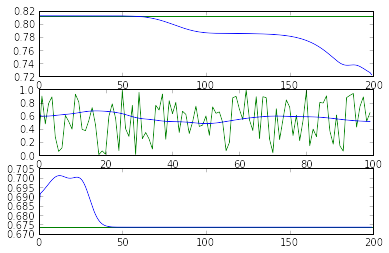

In [10]:
V0 = n1.getTotalVolume()
qi = [n1.q(i) for i in range(n1.Nedges)]  #this is a list of np.ndarrays pointing to underlying pipe data(!)
fig,ax = plt.subplots(nrows = n1.Nedges)
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])
    ax[k].plot(x,qi[k][0:n1.Ns[k]],'g')
dt = n1.T/n1.M
print dt
n1.runForwardProblem(dt)  #solve up to time T
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])
    ax[k].plot(x,qi[k][0:n1.Ns[k]],'b')
plt.show()


0.00666666666667


In [7]:
#n1.showCurrentData()
print "Initial Volume is %f"%V0
print "Final Volume is   %f" %n1.getTotalVolume()

Initial Volume is 349.918167
Final Volume is   349.918167
